# How to make predictions with a linear regression model

In [17]:
import pandas as pd #file processing
import seaborn as sns #visualizations
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #metrics
import numpy as np #math

## Get the data (csv from url referencing github raw data view)

In [2]:
housingPath = 'https://raw.githubusercontent.com/plthomps/CIS-3902-Data-Mining/refs/heads/main/housingData.csv'
housing = pd.read_csv(housingPath)

### This creates a new filtered dataframe named housing

In [3]:
housing = housing.query('sqft_living < 8000 and price < 1000000 and price > 0')

### This code creates a new boolean feature 'has_basement'

In [4]:
housing['has_basement'] = housing['sqft_basement'].apply(
    lambda x: True if x > 0 else False)

### Drop columns that are not necessary for the problem

In [5]:
housing = housing.drop(columns=['date','street','city','statezip','country',
                                'sqft_lot','yr_renovated','sqft_basement'])

## The Housing dataset

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4207 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4207 non-null   float64
 1   bedrooms      4207 non-null   float64
 2   bathrooms     4207 non-null   float64
 3   sqft_living   4207 non-null   int64  
 4   floors        4207 non-null   float64
 5   waterfront    4207 non-null   int64  
 6   view          4207 non-null   int64  
 7   condition     4207 non-null   int64  
 8   sqft_above    4207 non-null   int64  
 9   yr_built      4207 non-null   int64  
 10  has_basement  4207 non-null   bool   
dtypes: bool(1), float64(4), int64(6)
memory usage: 365.6 KB


In [7]:
housing.head(10)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
0,313000.0,3.0,1.50,1340,1.5,0,0,3,1340,1955,False
2,342000.0,3.0,2.00,1930,1.0,0,0,4,1930,1966,False
3,420000.0,3.0,2.25,2000,1.0,0,0,4,1000,1963,True
4,550000.0,4.0,2.50,1940,1.0,0,0,4,1140,1976,True
5,490000.0,2.0,1.00,880,1.0,0,0,3,880,1938,False
6,335000.0,2.0,2.00,1350,1.0,0,0,3,1350,1976,False
7,482000.0,4.0,2.50,2710,2.0,0,0,3,2710,1989,False
8,452500.0,3.0,2.50,2430,1.0,0,0,4,1570,1985,True
9,640000.0,4.0,2.00,1520,1.5,0,0,3,1520,1945,False
10,463000.0,3.0,1.75,1710,1.0,0,0,3,1710,1948,False


## How to identify correlations/trends with a scatterplot

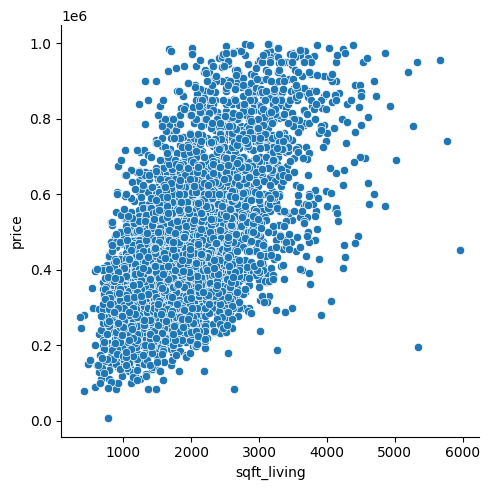

In [8]:
sns.relplot(data=housing, x='sqft_living', y='price')

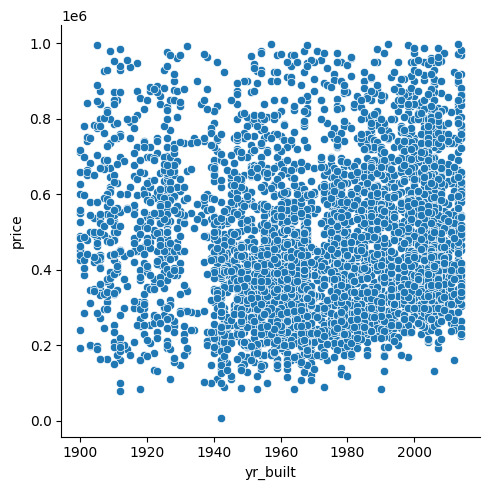

In [9]:
sns.relplot(data=housing, x='yr_built', y='price') #relationship plot

## How to identify correlations with a grid of scatterplots

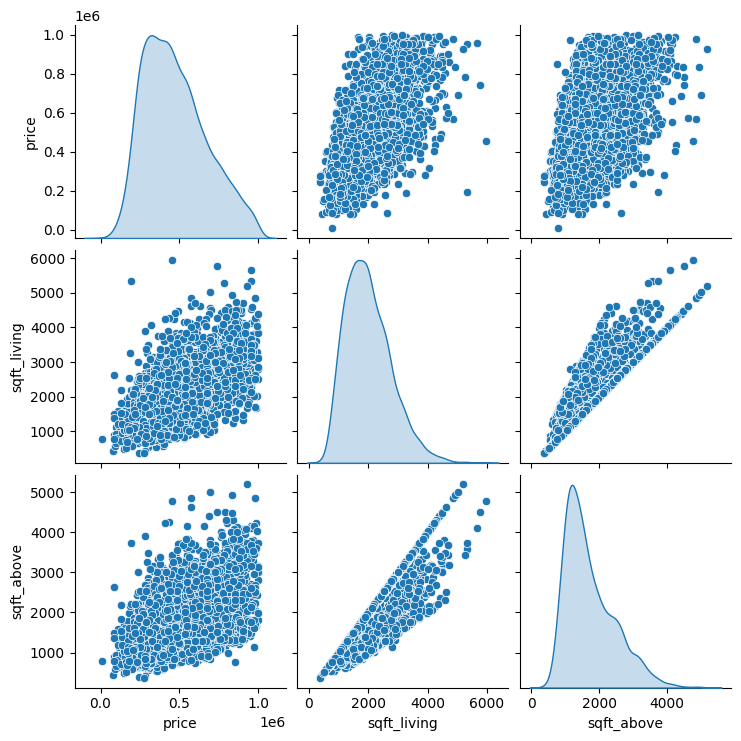

In [10]:
sns.pairplot(data=housing,
             y_vars=['price','sqft_living','sqft_above'],
             x_vars=['price','sqft_living','sqft_above'],
             diag_kind='kde')

## How to identify correlations with r-values

In [11]:
housing.corr().head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
price,1.000000,0.305046,0.460155,0.607379,0.272151,0.073671,0.196460,0.044926,0.517395,0.053012,0.152591
bedrooms,0.305046,1.000000,0.516726,0.603655,0.148377,-0.032263,0.060074,0.015105,0.466683,0.154287,0.157001
bathrooms,0.460155,0.516726,1.000000,0.715626,0.495380,0.020700,0.112797,-0.145555,0.637045,0.521801,0.127437
sqft_living,0.607379,0.603655,0.715626,1.000000,0.325647,0.030473,0.184432,-0.086310,0.848312,0.331001,0.175223
floors,0.272151,0.148377,0.495380,0.325647,1.000000,0.008710,-0.006647,-0.298350,0.526227,0.502039,-0.305249


In [12]:
housing.corr()[['price']].sort_values(by='price', ascending=False) #shows corr of each feature to price (note: price = 1)

,price
price,1.000000
sqft_living,0.607379
sqft_above,0.517395
bathrooms,0.460155
bedrooms,0.305046
floors,0.272151
view,0.196460
has_basement,0.152591
waterfront,0.073671
yr_built,0.053012


## How to identify correlations with a heatmap

<Axes: >

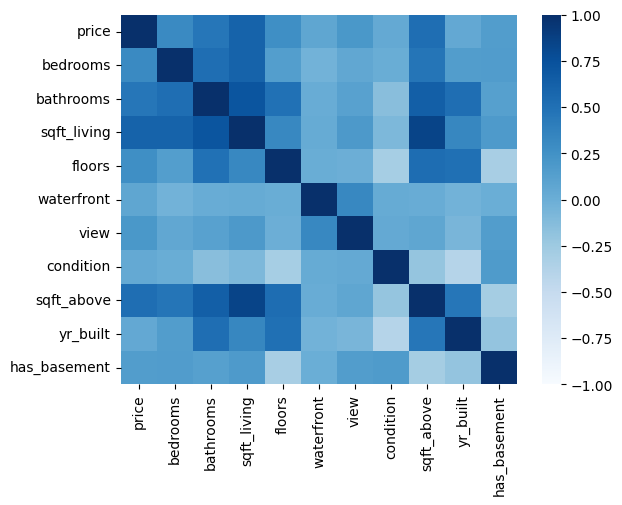

In [13]:
sns.heatmap(data=housing.corr(), cmap='Blues', vmin=-1.0, vmax=1.0)

<Axes: >

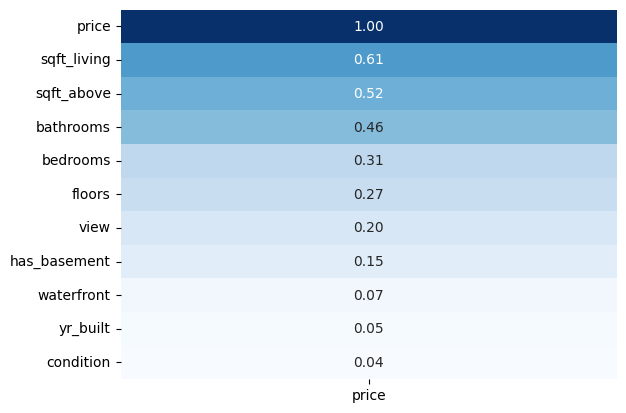

In [14]:
sns.heatmap(data=housing.corr()[['price']].sort_values(by='price', ascending=False),
            annot=True, cmap='Blues', cbar=False, fmt=f'.2f')

## How to create, validate, and use a linear regression model with scikit-learn
<p>Link to documentation for scikit-learn: <a href="https://scikit-learn.org/stable/">Scikit-Learn documentation</a></p>


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Explanation of x_train and test, y_train and test
<p>
x_train and x_test are the features (inputs).<br>
y_train and y_test are the target variables (outputs).<br>
The model separates the data 77% and 33% (train and test).<br>
The model uses x_train and y_train to learn, then is tested on x_test and compared with y_test to see how well it generalizes.</p>
<p>Random State Parameter: <br>
Without random_state (or random_state=None): Every time you run the code, the data might be split in a different way because the random shuffling changes each time.</p><p>

With random_state set to a specific number: The shuffling and splitting process will always be the same whenever you run the code, as long as the data doesn't change. This is useful for consistency, especially if you need to compare results across different runs or share your code with others and want them to get the same results.</p>

In [18]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(
    housing[['sqft_living']], housing[['price']],
    test_size=0.33, random_state=42)

# create the model from the training dataset
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

# Get predictions from the model using the test data
y_pred = linearModel.predict(x_test)

# validate the model with the test dataset, this is the R squared score
linearModel.score(x_test, y_test)

0.3507265465332233

### Summary of the Scores
<p>
R² (R-squared): How well the model fits the data.<br>
MAE (Mean Absolute Error): The average magnitude of errors in the predictions (in original units).<br>
MSE (Mean Squared Error): The average of the squared errors (penalizes large errors).<br>
RMSE (Root Mean Squared Error): The square root of MSE (in original units).<br>
MAPE (Mean Absolute Percentage Error): Percentage error (useful when comparing across datasets with different scales).<br>
</p>

In [19]:
# R-squared score (already calculated with .score())
r2 = linearModel.score(x_test, y_test)
print(f"R-squared: {r2:.3f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

R-squared: 0.351
Mean Absolute Error (MAE): 127747.57
Mean Squared Error (MSE): 24576718018.96
Root Mean Squared Error (RMSE): 156769.63
Mean Absolute Percentage Error (MAPE): 34.00%


### Print the equation for the regression line

In [21]:
# Get the slope (coefficient) and intercept
slope = linearModel.coef_[0][0]  # Get the first element as it's a single feature
intercept = linearModel.intercept_[0]

# Display the equation of the regression line
print(f"The equation of the regression line is: y = {slope:.2f}x + {intercept:.2f}")

The equation of the regression line is: y = 157.05x + 160591.26


### Explanation of Regression Line
<p>The slope of 157.05 means each additional square foot increases the price by 157.05. The intercept of 160591.26 means that if the house has 0 squar feet (a theoritial baseline), the predicted price will be 160,591.26.</p>

In [22]:
# use the model to make predictions
y_predicted = linearModel.predict(x_test)
y_predicted

array([[355333.11742787],
       [545363.47687159],
       [466838.5349527 ],
       ...,
       [325493.63949869],
       [415012.07328623],
       [394595.58838732]])

## How to plot the predicted data

In [26]:
# put predicted values in a frame
predicted = pd.DataFrame(y_predicted, columns=['price_predicted'])

# combine the test data and the predicted data
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])

# show combined
combined.head()

,price_predicted,sqft_living,price
0,355333.117428,1240,390000.0
1,545363.476872,2450,345000.0
2,466838.534953,1950,375000.0
3,518664.996619,2280,500324.0
4,539081.481518,2410,600000.0


In [28]:
#melt the data in order to improve some of the visualizations
# melt price and price_predicted columns into a single column
melted = pd.melt(combined, id_vars=['sqft_living'],
                 value_vars=['price','price_predicted'],
                 var_name='price_type', value_name='price_value')
melted.head()

,sqft_living,price_type,price_value
0,1240,price,390000.0
1,2450,price,345000.0
2,1950,price,375000.0
3,2280,price,500324.0
4,2410,price,600000.0


In [30]:
# Sort by 'sqft_living' in ascending order and display the top rows in order to see the results of melting the dataframe better
melted_sorted = melted.sort_values(by='sqft_living', ascending=True)  # Change to False for descending
melted_sorted.head()

,sqft_living,price_type,price_value
1337,370,price,276000.000000
2726,370,price_predicted,218699.718489
2139,580,price_predicted,251680.194095
750,580,price,90000.000000
1266,590,price,398000.000000


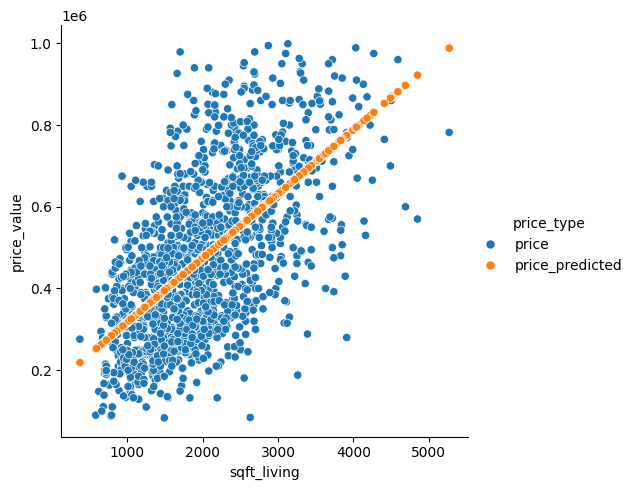

In [31]:
#relationship plot
sns.relplot(data=melted, x='sqft_living', y='price_value',
            hue='price_type')

## How to plot the residuals

In [32]:
combined['residual'] = combined.price - combined.price_predicted
combined.head()

,price_predicted,sqft_living,price,residual
0,355333.117428,1240,390000.0,34666.882572
1,545363.476872,2450,345000.0,-200363.476872
2,466838.534953,1950,375000.0,-91838.534953
3,518664.996619,2280,500324.0,-18340.996619
4,539081.481518,2410,600000.0,60918.518482


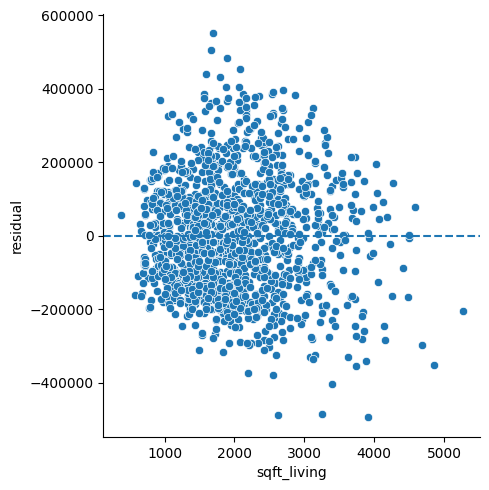

In [33]:
g = sns.relplot(data=combined, x='sqft_living', y='residual')

# draw a horizontal line where the Y axis is 0
for ax in g.axes.flat:
    ax.axhline(0, ls='--')

## How to plot a linear regression

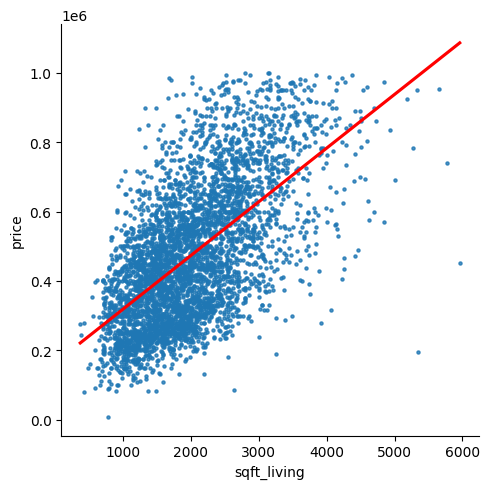

In [34]:
sns.lmplot(data=housing, x='sqft_living', y='price', ci=None,
           scatter_kws={'s':5}, line_kws={'color':'red'})

## How to plot a logistic regression

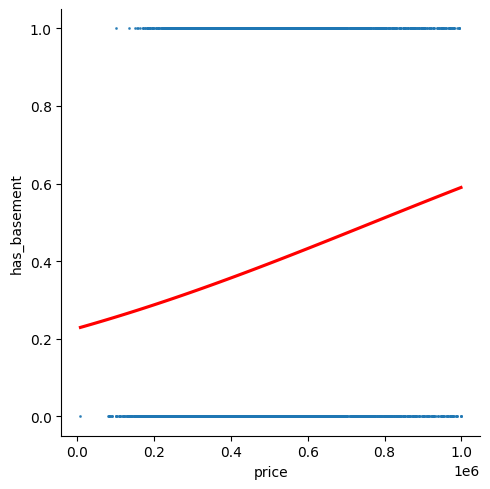

In [35]:
sns.lmplot(data=housing, x='price', y='has_basement', ci=None,
           scatter_kws={'s':1}, line_kws={'color':'red'},
           logistic=True)

## How to plot residuals with Seaborn

<Axes: xlabel='sqft_living', ylabel='price'>

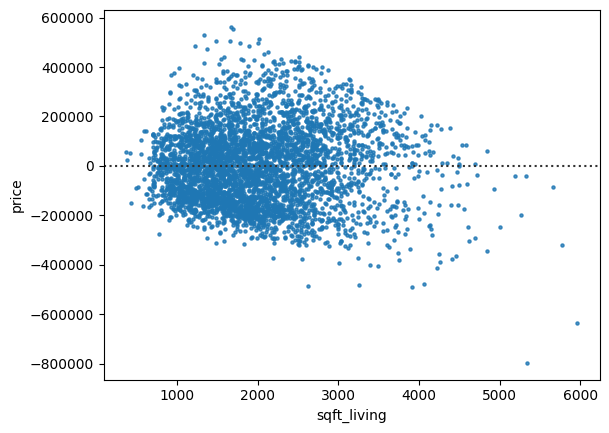

In [36]:
sns.residplot(data=housing, x='sqft_living', y='price',
              scatter_kws={'s':5})